In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

/opt/anaconda3/envs/jcopml/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [7]:
df = pd.read_csv("fake_job_postings.csv", index_col="job_id")
df.head()

title            location  \
job_id                                                                  
1                                Marketing Intern    US, NY, New York   
2       Customer Service - Cloud Video Production      NZ, , Auckland   
3         Commissioning Machinery Assistant (CMA)       US, IA, Wever   
4               Account Executive - Washington DC  US, DC, Washington   
5                             Bill Review Manager  US, FL, Fort Worth   

       department salary_range  \
job_id                           
1       Marketing          NaN   
2         Success          NaN   
3             NaN          NaN   
4           Sales          NaN   
5             NaN          NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3       Valor Services provides Workforce Solutions th...   
4       Our passion for improving quality of life thro...   
5       SpotSource Solutions LLC is a Global Human Cap...   

                                              description  \
job_id                                                      
1       Food52, a fast-growing, James Beard Award-winn...   
2       Organised - Focused - Vibrant - Awesome!Do you...   
3       Our client, located in Houston, is actively se...   
4       THE COMPANY: ESRI – Environmental Systems Rese...   
5       JOB TITLE: Itemization Review ManagerLOCATION:...   

                                             requirements  \
job_id                                                      
1       Experience with content management systems a m...   
2       What we expect from you:Your key responsibilit...   
3       Implement pre-commissioning and commissioning ...   
4       EDUCATION: Bachelor’s or Master’s in GIS, busi...   
5       QUALIFICATIONS:RN license in the State of Texa...   

                                                 benefits  telecommuting  \
job_id                                                                     
1                                                     NaN              0   
2       What you will get from usThrough being part of...              0   
3                                                     NaN              0   
4       Our culture is anything but corporate—we have ...              0   
5                                   Full Benefits Offered              0   

        has_company_logo  has_questions employment_type required_experience  \
job_id                                                                        
1                      1              0           Other          Internship   
2                      1              0       Full-time      Not Applicable   
3                      1              0             NaN                 NaN   
4                      1              0       Full-time    Mid-Senior level   
5                      1              1       Full-time    Mid-Senior level   

       required_education                   industry              function  \
job_id                                                                       
1                     NaN                        NaN             Marketing   
2                     NaN  Marketing and Advertising      Customer Service   
3                     NaN                        NaN                   NaN   
4       Bachelor's Degree          Computer Software                 Sales   
5       Bachelor's Degree     Hospital & Health Care  Health Care Provider   

        fraudulent  
job_id              
1                0  
2                0  
3                0  
4                0  
5                0

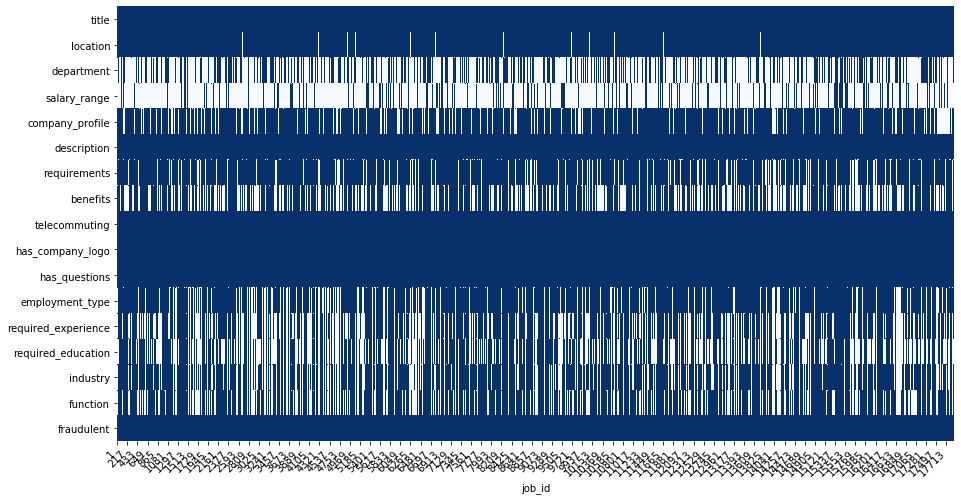

In [10]:
plot_missing_value(df)

In [11]:
df.drop(columns="department", inplace=True)

In [12]:
df.drop(columns="salary_range", inplace=True)

In [13]:
df.company_profile = df.company_profile.notnull().astype('int')

In [14]:
df.description.isna().sum()

1

In [15]:
df.requirements.isna().sum()

2695

In [16]:
df.benefits.isna().sum()

7210

In [26]:
import nltk
import string
top_N = 100

In [30]:
txt = df.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist_without_punctuation = nltk.FreqDist(w for w in words if w not in stopwords)

print('All frequencies, including STOPWORDS:')
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist_without_punctuation.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

All frequencies, including STOPWORDS:
              Frequency
Word                   
,                159448
.                 77495
:                 22141
;                 18228
team              17627
...                 ...
able               2791
requirements       2787
social             2776
mobile             2737
website            2728

[100 rows x 1 columns]


In [29]:
txt = df.description.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords and w not in string.punctuation)

print('All frequencies, including STOPWORDS:')
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

All frequencies, including STOPWORDS:
          Frequency
Word               
team          17627
’             16262
work          14367
business      10472
new            9707
...             ...
across         2598
care           2590
key            2550
building       2530
digital        2530

[100 rows x 1 columns]


In [70]:
print('All frequencies, not including STOPWORDS:')
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

All frequencies, not including STOPWORDS:
            Frequency
Word                 
team            17627
’               16262
work            14367
business        10472
new              9707
company          9644
experience       9636
customer         9569
sales            9043
looking          8720


In [75]:
description_word = []
for row in words_except_stop_dist.most_common(11):
    if len(row[0])<2:
        continue
    description_word.append(row[0])
description_word

['team',
 'work',
 'business',
 'new',
 'company',
 'experience',
 'customer',
 'sales',
 'looking',
 'development']

In [56]:
df.description.dropna(inplace=True)

In [67]:
print('All frequencies, including STOPWORDS:')
print('=' * 60)

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

All frequencies, including STOPWORDS:
         Frequency
Word              
and         175405
,           159448
the          98705
to           98109
.            77495
...            ...
well          3736
through       3711
join          3671
do            3590
up            3588

[100 rows x 1 columns]


In [3]:
df = pd.read_csv("fake_job_postings.csv", index_col="job_id")
df.head()

title            location  \
job_id                                                                  
1                                Marketing Intern    US, NY, New York   
2       Customer Service - Cloud Video Production      NZ, , Auckland   
3         Commissioning Machinery Assistant (CMA)       US, IA, Wever   
4               Account Executive - Washington DC  US, DC, Washington   
5                             Bill Review Manager  US, FL, Fort Worth   

       department salary_range  \
job_id                           
1       Marketing          NaN   
2         Success          NaN   
3             NaN          NaN   
4           Sales          NaN   
5             NaN          NaN   

                                          company_profile  \
job_id                                                      
1       We're Food52, and we've created a groundbreaki...   
2       90 Seconds, the worlds Cloud Video Production ...   
3       Valor Services provides Workforce Solutions th...   
4       Our passion for improving quality of life thro...   
5       SpotSource Solutions LLC is a Global Human Cap...   

                                              description  \
job_id                                                      
1       Food52, a fast-growing, James Beard Award-winn...   
2       Organised - Focused - Vibrant - Awesome!Do you...   
3       Our client, located in Houston, is actively se...   
4       THE COMPANY: ESRI – Environmental Systems Rese...   
5       JOB TITLE: Itemization Review ManagerLOCATION:...   

                                             requirements  \
job_id                                                      
1       Experience with content management systems a m...   
2       What we expect from you:Your key responsibilit...   
3       Implement pre-commissioning and commissioning ...   
4       EDUCATION: Bachelor’s or Master’s in GIS, busi...   
5       QUALIFICATIONS:RN license in the State of Texa...   

                                                 benefits  telecommuting  \
job_id                                                                     
1                                                     NaN              0   
2       What you will get from usThrough being part of...              0   
3                                                     NaN              0   
4       Our culture is anything but corporate—we have ...              0   
5                                   Full Benefits Offered              0   

        has_company_logo  has_questions employment_type required_experience  \
job_id                                                                        
1                      1              0           Other          Internship   
2                      1              0       Full-time      Not Applicable   
3                      1              0             NaN                 NaN   
4                      1              0       Full-time    Mid-Senior level   
5                      1              1       Full-time    Mid-Senior level   

       required_education                   industry              function  \
job_id                                                                       
1                     NaN                        NaN             Marketing   
2                     NaN  Marketing and Advertising      Customer Service   
3                     NaN                        NaN                   NaN   
4       Bachelor's Degree          Computer Software                 Sales   
5       Bachelor's Degree     Hospital & Health Care  Health Care Provider   

        fraudulent  
job_id              
1                0  
2                0  
3                0  
4                0  
5                0

In [5]:
import nltk
import string
top_N = 20

In [6]:
txt = df.title.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords and w not in string.punctuation)

print('All frequencies, including STOPWORDS:')
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

print(rslt)
print('=' * 60)

All frequencies, including STOPWORDS:
            Frequency
Word                 
manager          2201
developer        1790
engineer         1598
sales            1300
senior            972
customer          966
service           886
english           780
teacher           776
marketing         765
abroad            692
assistant         669
associate         654
software          641
designer          589
web               534
business          518
specialist        508
account           492
executive         483
